In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train, y_train),(x_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 56s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

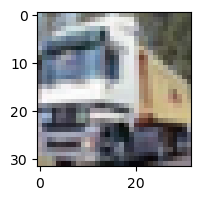

In [12]:
plt.figure(figsize=(15,2))
plt.imshow(x_train[1])

In [13]:
y_train.shape

(50000, 1)

In [16]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [17]:
#to flatten the above 2d array

y_train=y_train.reshape(-1,) #(-1,) -1  -- keeps the rows as it is; '' - flatten the 2d array
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [18]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [19]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
    

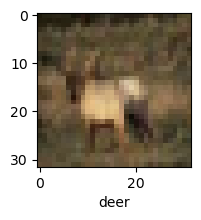

In [22]:
plot_sample(x_train, y_train, 3)

In [23]:
#Normalizing the data

x_train=x_train/255
x_test=x_test/255

In [24]:
# classification using a simple artificial neural network

ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10, activation='sigmoid')
    ])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy', #-sparse_categorical_crossentrpy - when the labels are like 1,2,3,etc 
                                                   # categorical_crossentrpy - when the labels follow one hot encoding
           metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)




Epoch 1/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.8144 - accuracy: 0.3520
Epoch 2/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.6210 - accuracy: 0.4272
Epoch 3/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.5413 - accuracy: 0.4557
Epoch 4/5
1563/1563 [==============================] - 87s 56ms/step - loss: 1.4827 - accuracy: 0.4755
Epoch 5/5
1563/1563 [==============================] - 89s 57ms/step - loss: 1.4321 - accuracy: 0.4950


In [25]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.4556 - accuracy: 0.4847


[1.4556244611740112, 0.4846999943256378]

In [27]:
y_test[0]

array([3], dtype=uint8)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred= ann.predict(x_test)
y_pred_class= [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test,y_pred_class))

313/313 [==============================] - 4s 12ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.42      0.68      0.52      1000
           1       0.66      0.55      0.60      1000
           2       0.46      0.26      0.33      1000
           3       0.38      0.23      0.28      1000
           4       0.54      0.29      0.38      1000
           5       0.37      0.42      0.39      1000
           6       0.54      0.52      0.53      1000
           7       0.42      0.69      0.52      1000
           8       0.58      0.66      0.62      1000
           9       0.56      0.56      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.47     10000
weighted avg       0.49      0.48      0.47     10000



In [ ]:
# using CNN to improve the performance of the model

In [30]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10, activation='softmax')
        
])

In [31]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [32]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.4960 - accuracy: 0.4632
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.1641 - accuracy: 0.5905
Epoch 3/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0364 - accuracy: 0.6376
Epoch 4/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9519 - accuracy: 0.6655
Epoch 5/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8933 - accuracy: 0.6879
Epoch 6/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8435 - accuracy: 0.7059
Epoch 7/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8023 - accuracy: 0.7172
Epoch 8/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7678 - accuracy: 0.7294
Epoch 9/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7357 - accuracy: 0.7401
Epoch 10/10
1563/1563 [==============================] - 29s 19m